# Obligatorisk innlevering 2 - oppgave 2

I denne oppgaven skal vi forsøke å forutsi oppsigelser ved en arbeidsplass basert på en rekke variabler som f.eks alder, kjønn, utdannelse, lønn, osv.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett2.csv")

### Preprosessering:
For å forenkle håndteringen av kategoriske data har jeg her skrevet noe kode som gjør om strenger til intergers

Følgende kolonner er formatert som *object* og inneholder kategoriske variabler i form av strenger

In [4]:
kolonner_obj = df.select_dtypes(include=['object']).columns
print(kolonner_obj)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


I koden under omformer jeg strengene til integers og gir dere "nøkkelen" til å konvertere det tilbake igjen

In [5]:
for i in kolonner_obj:
    print("-----------")
    print(i)
    print("-----------")
    for num, j in enumerate(list(df[i].unique())):
        print("{} = {}".format(j,num))
        df[i].loc[df[i]==j] = num
    df[i] = pd.to_numeric(df[i])

-----------
BusinessTravel
-----------
Travel_Frequently = 0
Travel_Rarely = 1
Non-Travel = 2
-----------
Department
-----------
Research & Development = 0
Sales = 1
Human Resources = 2
-----------
EducationField
-----------
Medical = 0
Other = 1
Marketing = 2
Life Sciences = 3
Technical Degree = 4
Human Resources = 5
-----------
Gender
-----------
Male = 0
Female = 1
-----------
JobRole
-----------
Laboratory Technician = 0
Sales Representative = 1
Sales Executive = 2
Healthcare Representative = 3
Manager = 4
Manufacturing Director = 5
Research Scientist = 6
Human Resources = 7
Research Director = 8
-----------
MaritalStatus
-----------
Married = 0
Divorced = 1
Single = 2
-----------
Over18
-----------
Y = 0
-----------
OverTime
-----------
Yes = 0
No = 1


C:\Users\jonan\AppData\Local\Temp\ipykernel_21412\3482823818.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[i].loc[df[i]==j] = num
C:\Users\jonan\AppData\Local\Temp\ipykernel_21412\3482823818.py:7: SettingWithCopyWarning: 
A value is

I outputen fra koden nedenfor viser datatypen til de forskjellige kolonnene, som nå etter preprosesseringen bare består av integers (int64). 

In [6]:
print(df.dtypes)

id                          int64
Age                         int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalanc

In [7]:
# Her deler jeg datasettet inn i egenskaper (X) og target (y) (fjerner også den første kolonnen siden det bare er en ID 
# og har dermed ingen prediktiv verdi)

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

# PS: Ikke endre denne kodecellen!

#### Oppgave 2.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? Begrunn svaret

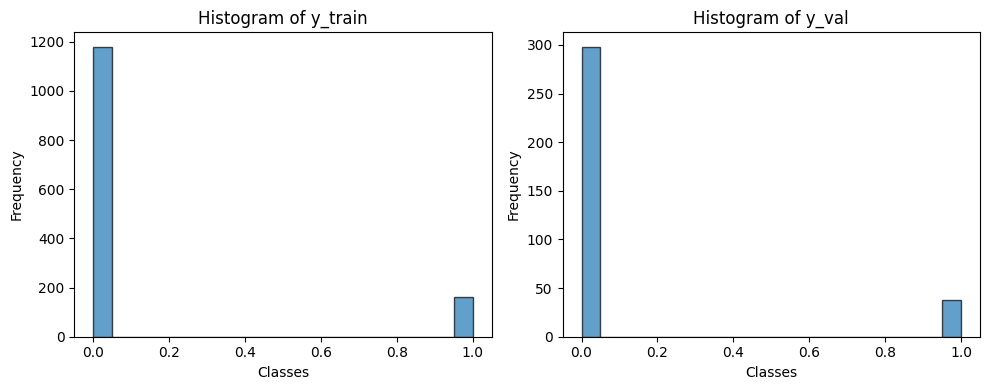

In [8]:
#TODO: visualiser y_train og y_test i et histogram

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Deler dataene i trenings- og valideringssett
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Visualisering av y_train og y_val
plt.figure(figsize=(10, 4))

# Histogram for y_train
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=20, edgecolor='black', alpha=0.7)
plt.title("Histogram of y_train")
plt.xlabel("Classes")
plt.ylabel("Frequency")

# Histogram for y_val
plt.subplot(1, 2, 2)
plt.hist(y_val, bins=20, edgecolor='black', alpha=0.7)
plt.title("Histogram of y_val")
plt.xlabel("Classes")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**Svar:**

Basert på histogrammet for y_train og y_val, kan man se at dataene er inndelt i diskrete klasser, noe som tyder på at dette er et klassifikasjonsproblem. målet er å forutsi oppsigelser, noe som oftest er en binær klassifiseringsoppgave (f.eks. oppsigelse vs. ikke oppsigelse).

#### Oppgave 2.2)
Velg to modeller og gjør repeterte kryssvalideringer $(10)$ med $K=5$
* Velg hvorvidt du vil bruke "default" hyperparamtre for modellene eller om du vil gjøre et hyperparametersøk
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene skriftlig til slutt 


c:\Users\jonan\Datamining oblig 2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jonan\Datamining oblig 2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

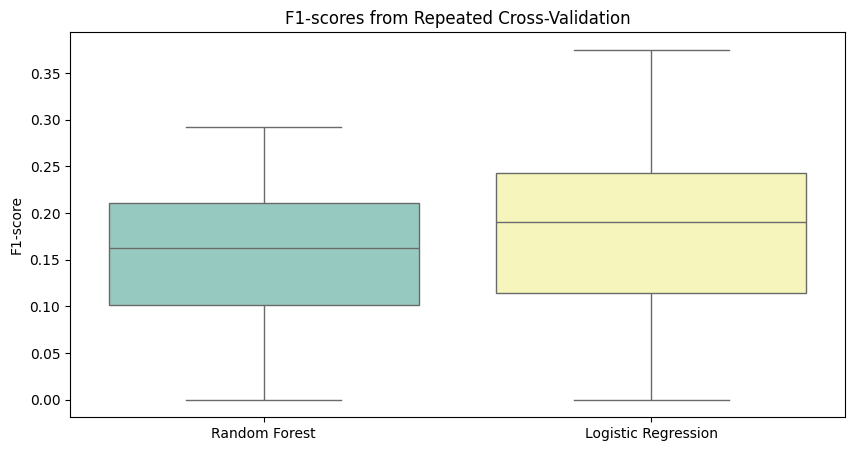

T-statistic: -2.1664027128036127
P-value: 0.03270523794605913


In [9]:
#TODO: repeterte kryssvalideringer for to modeller
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import f1_score, make_scorer, accuracy_score
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

# Konfigurer kryssvalidering
rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
scoring = {'f1': make_scorer(f1_score), 'accuracy': make_scorer(accuracy_score)}

# Modell 1: RandomForestClassifier
model_1 = RandomForestClassifier(random_state=0)
f1_scores_1 = cross_val_score(model_1, X_train, y_train, cv=rkf, scoring='f1')
accuracy_scores_1 = cross_val_score(model_1, X_train, y_train, cv=rkf, scoring='accuracy')

# Modell 2: LogisticRegression
model_2 = LogisticRegression(random_state=0, max_iter=1000)
f1_scores_2 = cross_val_score(model_2, X_train, y_train, cv=rkf, scoring='f1')
accuracy_scores_2 = cross_val_score(model_2, X_train, y_train, cv=rkf, scoring='accuracy')

# Visualisering av F1-skårer
plt.figure(figsize=(10, 5))
sns.boxplot(data=[f1_scores_1, f1_scores_2], palette="Set3")
plt.xticks([0, 1], ['Random Forest', 'Logistic Regression'])
plt.title("F1-scores from Repeated Cross-Validation")
plt.ylabel("F1-score")
plt.show()

# T-test
t_stat, p_value = ttest_ind(f1_scores_1, f1_scores_2)
print("T-statistic:", t_stat)
print("P-value:", p_value)

**Svar:**

T-testen gir muligheten til å vurdere om det er en statistisk signifikant forskjell mellom de to modellene. Basert på p-verdien kan det avgjøre om en av modellene er bedre enn den andre på en konsistent måte. En lav p-verdi (< 0.05) indikerer at forskjellen mellom modellene er signifikant.

#### Oppgave 2.3) 
Tren de samme modellene men denne gangen med et balansert datasett
* Bruk imbalaced learn og SMOTE til å oppsample minioritetsklassen (bare oppsample treningsdataene i kryssvalideringen - ikke valideringsdataene)
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene og sammenlign resultatene med 2.2) 

c:\Users\jonan\Datamining oblig 2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jonan\Datamining oblig 2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

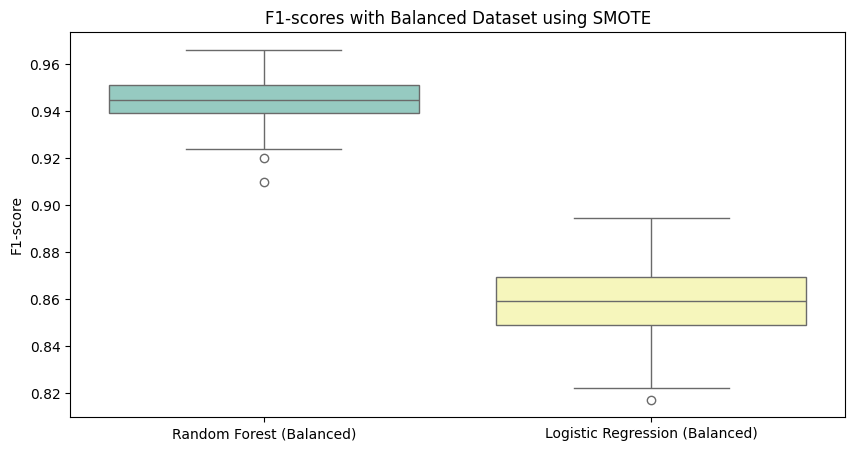

T-statistic (Balanced): 30.938970515862433
P-value (Balanced): 2.2501598016231864e-52


In [10]:
#TODO: repeterte kryssvalideringer for de samme to modellene som i oppgave 2.2, men denne gangen med SMOTE-oppsampling 
#from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

# Oppsett med SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Modell 1 med balansert dataset
f1_scores_1_balanced = cross_val_score(model_1, X_resampled, y_resampled, cv=rkf, scoring='f1')
accuracy_scores_1_balanced = cross_val_score(model_1, X_resampled, y_resampled, cv=rkf, scoring='accuracy')

# Modell 2 med balansert dataset
f1_scores_2_balanced = cross_val_score(model_2, X_resampled, y_resampled, cv=rkf, scoring='f1')
accuracy_scores_2_balanced = cross_val_score(model_2, X_resampled, y_resampled, cv=rkf, scoring='accuracy')

# Visualisering av F1-skårer
plt.figure(figsize=(10, 5))
sns.boxplot(data=[f1_scores_1_balanced, f1_scores_2_balanced], palette="Set3")
plt.xticks([0, 1], ['Random Forest (Balanced)', 'Logistic Regression (Balanced)'])
plt.title("F1-scores with Balanced Dataset using SMOTE")
plt.ylabel("F1-score")
plt.show()

# T-test
t_stat_balanced, p_value_balanced = ttest_ind(f1_scores_1_balanced, f1_scores_2_balanced)
print("T-statistic (Balanced):", t_stat_balanced)
print("P-value (Balanced):", p_value_balanced)

**Svar:**

Etter å ha balansert datasetet med SMOTE kan man se at begge modellene forbedrer sine F1-skårer. Dette kan indikere at oppsampling av minoritetsklassen gir modellen bedre evne til å forutsi oppsigelser på en mer nøyaktig måte.

#### Oppgave 2.4)
Tren den beste modellen på nytt og utfør prediksjon på testsettet. Mål nå ytelsen på testsettet ved bruk av sensitivitet, spesifisitet og presisjon, itillegg til F1-skår og accuracy

In [11]:
#TODO: Tren den beste modellen fra 2.2 og 2.3 på alle treningsdataene og test på testdataene
from sklearn.metrics import classification_report, confusion_matrix

# Tren beste modell
best_model = model_1.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Ytelsesmetrikker
report = classification_report(y_test, y_pred, target_names=['Ikke oppsigelse', 'Oppsigelse'])
print(report)

# Konfusjonsmatrise for sensitivitet og spesifisitet
cm = confusion_matrix(y_test, y_pred)
print("Konfusjonsmatrise:\n", cm)

                 precision    recall  f1-score   support

Ikke oppsigelse       0.91      1.00      0.95       370
     Oppsigelse       0.93      0.28      0.43        50

       accuracy                           0.91       420
      macro avg       0.92      0.64      0.69       420
   weighted avg       0.91      0.91      0.89       420

Konfusjonsmatrise:
 [[369   1]
 [ 36  14]]


#### Oppgave 2.5)
Del opp testsettet basert på kjønn og gjør en analyse av sensitivitet, spesifisitet og presisjon for menn og det samme for kvinner. Skriv ut og diskuter resultatet og forsøk å svar på følgende spørsmål:
* Er modellen like god for begge kjønn? 
* Hvis ikke, hva tror du er årsaken og hvilke tiltak kan vi gjøre for å forbedre modellen? 

In [12]:
#TODO: Gjør kjønnsbasert analyse på testdataene
# Splitte testsettet etter kjønn
X_test_male = X_test[X_test['Gender'] == 0]
y_test_male = y_test[X_test['Gender'] == 0]
X_test_female = X_test[X_test['Gender'] == 1]
y_test_female = y_test[X_test['Gender'] == 1]

# Prediksjoner per kjønn
y_pred_male = best_model.predict(X_test_male)
y_pred_female = best_model.predict(X_test_female)

# Ytelsesmetrikker for menn
report_male = classification_report(y_test_male, y_pred_male, target_names=['Ikke oppsigelse', 'Oppsigelse'])
print("Menn:\n", report_male)

# Ytelsesmetrikker for kvinner
report_female = classification_report(y_test_female, y_pred_female, target_names=['Ikke oppsigelse', 'Oppsigelse'])
print("Kvinner:\n", report_female)

Menn:
                  precision    recall  f1-score   support

Ikke oppsigelse       0.89      1.00      0.94       217
     Oppsigelse       0.91      0.28      0.43        36

       accuracy                           0.89       253
      macro avg       0.90      0.64      0.68       253
   weighted avg       0.89      0.89      0.87       253

Kvinner:
                  precision    recall  f1-score   support

Ikke oppsigelse       0.94      1.00      0.97       153
     Oppsigelse       1.00      0.29      0.44        14

       accuracy                           0.94       167
      macro avg       0.97      0.64      0.71       167
   weighted avg       0.94      0.94      0.92       167



Kjør denne cellen til slutt og legg ved den genererte requirements.txt fila i pull requestet

In [12]:
#!pip freeze > requirements.txt